In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
orders=pd.read_csv('orders.csv')
orders.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [3]:
order_details=pd.read_csv('order_details.csv')
order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [4]:
pizzas=pd.read_csv('pizzas.csv')
pizzas.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [5]:
pizza_types=pd.read_csv('pizza_types.csv', encoding='latin1')
pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


### Using Merge to combine the 4 dataframes into a single dataframe df

In [6]:
df=orders.merge(order_details, on='order_id').merge(pizzas, on='pizza_id').merge(pizza_types, on='pizza_type_id')
df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,2,2015-01-01,11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,2,2015-01-01,11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,2,2015-01-01,11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          48620 non-null  int64  
 1   date              48620 non-null  object 
 2   time              48620 non-null  object 
 3   order_details_id  48620 non-null  int64  
 4   pizza_id          48620 non-null  object 
 5   quantity          48620 non-null  int64  
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


In [8]:
# Checking for missing values
df.isnull().sum()

order_id            0
date                0
time                0
order_details_id    0
pizza_id            0
quantity            0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64

## Converting date to Datetime

In [9]:
df['date']=pd.to_datetime(df['date'])

In [10]:
# Extracting year
df['year']=df['date'].dt.year
df['year'].value_counts()

year
2015    48620
Name: count, dtype: int64

In [11]:
# Extracting month names from date
df['month']=df['date'].dt.month_name()
#df['month'].value_counts()

# Define month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert month column to ordered categorical type
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

# Count and Sort the months in calender order
month= df['month'].value_counts().sort_index()
month

month
January      4156
February     3892
March        4186
April        4067
May          4239
June         4025
July         4301
August       4094
September    3819
October      3797
November     4185
December     3859
Name: count, dtype: int64

In [12]:
# Extracting the days  of the week
df['day_of_week']=df['date'].dt.day_name()
df['day_of_week'].value_counts()

day_of_week
Friday       8106
Saturday     7355
Thursday     7323
Wednesday    6797
Tuesday      6753
Monday       6369
Sunday       5917
Name: count, dtype: int64

In [13]:
df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,year,month,day_of_week
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015,January,Thursday
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015,January,Thursday
2,2,2015-01-01,11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015,January,Thursday
3,2,2015-01-01,11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015,January,Thursday
4,2,2015-01-01,11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015,January,Thursday


## 1) Calculation of total revenue

In [14]:
# revenue per row
df['revenue']=df['quantity']*df['price']

In [15]:
# Total revenue for the year
total_revenue= df['revenue'].sum()
print(f'The total revenue generated: ${total_revenue}')

The total revenue generated: $817860.05


## 2) Calculation of total quantity sold

In [16]:
total_quantity_sold=df['quantity'].sum()
print(f'The total quantity sold is {total_quantity_sold} units')

The total quantity sold is 49574 units


## 3) Finding the total orders 

In [17]:
total_orders= df['order_id'].nunique()
print(f'The total orders taken are {total_orders}')

The total orders taken are 21350


### Insights

While I was exploring the datasets, I observed that some entries shared the same order_id. This indicates that a single order could include multiple items. for example, if Table 1 ordered three different pizzas (e.g., The Classic Deluxe, Hawaiian, and Italian Supreme), each item would be recorded separately but would have the same order_id. I would like to think that a payment receipt could stand as an order_id in this case. To prevent counting duplicate orders, I used the .nunique() function to determine the actual number of unique orders.

## 4) How many pizza types is sold

In [18]:
# use nunique to provide the actual number of pizza types by removing duplicates
number_of_pizza_types_sold= df['pizza_type_id'].nunique()
print(f'Number of pizza_types sold is {number_of_pizza_types_sold}')

Number of pizza_types sold is 32


## 5) Average price of the pizzas

In [19]:
avg_price= df['price'].mean()
print(f'Average price of the pizzas is ${avg_price:.2f}')

Average price of the pizzas is $16.49


## 6) Peak hours of sales

In [20]:
# Convert time to datetime
df['time']=pd.to_datetime(df['time'], format= '%H:%M:%S')

# Extract the number of hours
df['hours']= df['time'].dt.hour
hours= df['hours'].value_counts().sort_index()
hours

hours
9        4
10      17
11    2672
12    6543
13    6203
14    3521
15    3170
16    4185
17    5143
18    5359
19    4350
20    3487
21    2528
22    1370
23      68
Name: count, dtype: int64

#### Peak hours of sales

In [21]:
peak_hours_of_sales= df.groupby('hours')['quantity'].sum().reset_index()
peak_hours_of_sales

,hours,quantity
0,9,4
1,10,18
2,11,2728
3,12,6776
4,13,6413
5,14,3613
6,15,3216
7,16,4239
8,17,5211
9,18,5417


<function matplotlib.pyplot.show(close=None, block=None)>

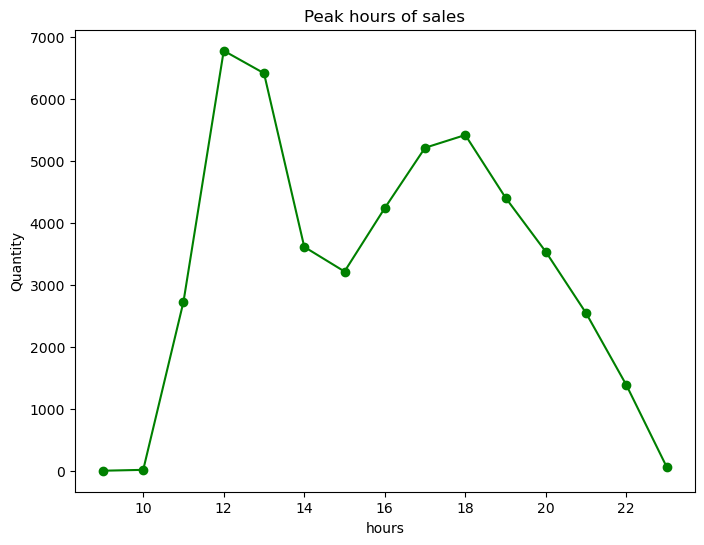

In [22]:
# Visualizing peak hours of sales
plt.figure(figsize=(8,6))
plt.plot(peak_hours_of_sales['hours'], peak_hours_of_sales['quantity'], color='green', marker='o')
plt.xlabel('hours')
plt.ylabel('Quantity')
plt.title('Peak hours of sales')
plt.show

### Insights
From the plot above, sales peak at the 12th hour.  This indicates that most orders were placed during noon, and also there is a sharp decline in sales from the 18 hour mark downwards i.e from 6:00 pm

## 7) Total sales made on each day of the week

### Sales made on each day of the week... Groupby days of the week

In [23]:
# groupby days of the week
daily_sales= df.groupby('day_of_week')['revenue'].sum().reset_index()
daily_sales

,day_of_week,revenue
0,Friday,136073.90
1,Monday,107329.55
2,Saturday,123182.40
3,Sunday,99203.50
4,Thursday,123528.50
5,Tuesday,114133.80
6,Wednesday,114408.40


### day of the week most sales are made

In [24]:
most_daily_sales= daily_sales.iloc[0]
print(f'The day of the week with the highest sales is {most_daily_sales['day_of_week']} with a revenue of ${most_daily_sales['revenue']}')

The day of the week with the highest sales is Friday with a revenue of $136073.9


<function matplotlib.pyplot.show(close=None, block=None)>

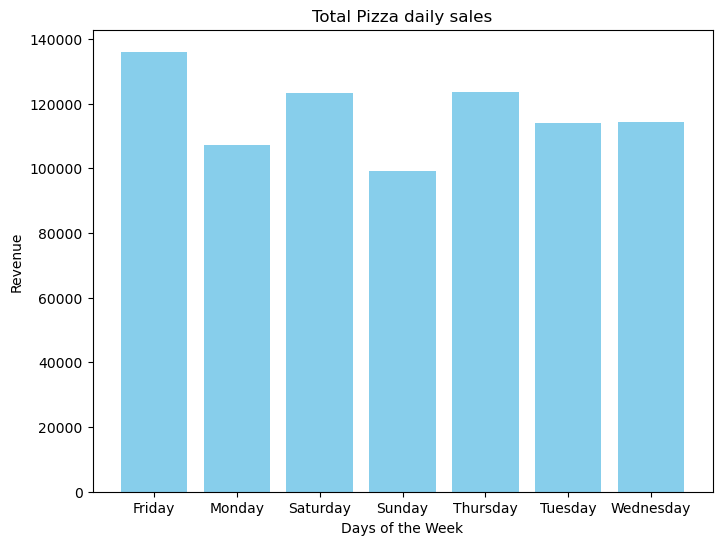

In [25]:
# Visualizing the total sales made on each day
plt.figure(figsize=(8,6))
plt.bar(daily_sales['day_of_week'],daily_sales['revenue'], color='skyblue')
plt.xlabel('Days of the Week')
plt.ylabel('Revenue')
plt.title('Total Pizza daily sales')
plt.show


## 8) Top 5 best selling pizzas

#### Top 5

In [26]:
# Group by name and sort
best_selling_pizzas= df.groupby('name')['quantity'].sum().reset_index().sort_values(by='quantity', ascending=False)
best_selling_pizzas.head()

,name,quantity
7,The Classic Deluxe Pizza,2453
0,The Barbecue Chicken Pizza,2432
12,The Hawaiian Pizza,2422
20,The Pepperoni Pizza,2418
30,The Thai Chicken Pizza,2371


#### Best, worst pizzas Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

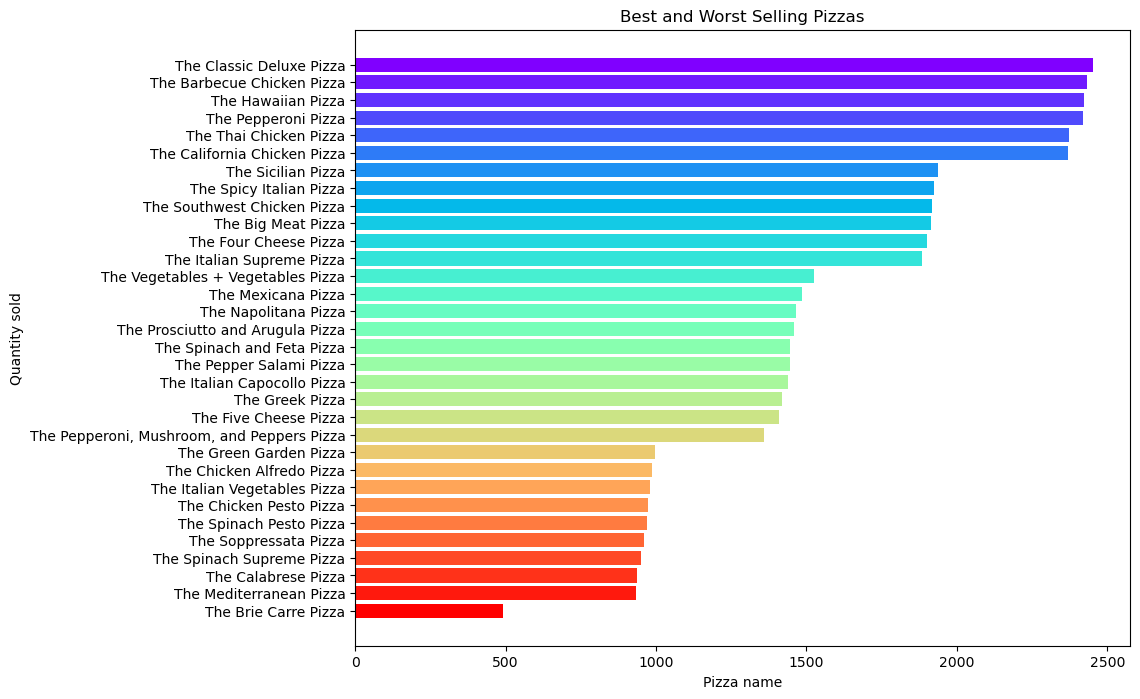

In [27]:
# Visualization to see best-selling pizzas
colors=plt.cm.rainbow(np.linspace(0,1, len(best_selling_pizzas)))
plt.figure(figsize=(10,8))
plt.barh(best_selling_pizzas['name'], best_selling_pizzas['quantity'], color=colors)
#plt.xticks(rotation=90)
plt.xlabel('Pizza name')
plt.ylabel('Quantity sold')
plt.title('Best and Worst Selling Pizzas')

# Invert y-axis to have the highest values at the top
plt.gca().invert_yaxis()

plt.show

## 9) Monthly sales

In [28]:
# Monthly sales
monthly_sales=df.groupby('month')['quantity'].count().reset_index()
monthly_sales

,month,quantity
0,January,4156
1,February,3892
2,March,4186
3,April,4067
4,May,4239
5,June,4025
6,July,4301
7,August,4094
8,September,3819
9,October,3797


Text(0.5, 1.0, 'Monthly Sales trend')

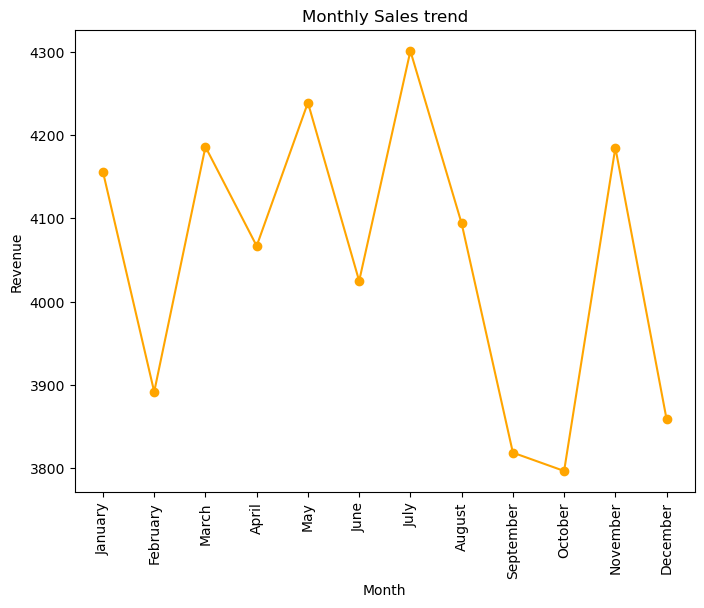

In [29]:
# Visualization
plt.figure(figsize=(8,6))
plt.plot(monthly_sales['month'], monthly_sales['quantity'], color='orange', marker='o')
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Sales trend')


#### Insights
July was the month of peak sales, which indicates that customer demand was high as at the time. Surprisingly, the peak sales were not during the holiday periods December and early January. 

#### Recommendations
The peak sales in July should be capitalized upon by introducing limited-time offers or discounts on popular pizza types to create urgency and boost sales. For instance, flash sales can entice customers to make quick purchases.

## 10) Pizza types not doing well on the menu

In [30]:
# least selling pizzas
least_selling_pizzas= df.groupby(['pizza_type_id', 'name'])['quantity'].sum().reset_index().sort_values(by='quantity', ascending=True)

# five pizza types that are least sold
least_selling_pizzas.head()

,pizza_type_id,name,quantity
2,brie_carre,The Brie Carre Pizza,490
15,mediterraneo,The Mediterranean Pizza,934
3,calabrese,The Calabrese Pizza,937
28,spinach_supr,The Spinach Supreme Pizza,950
23,soppressata,The Soppressata Pizza,961


# FURTHER ANALYSIS

## Revenues generated from sale of each pizza size

In [31]:
revenue_by_size= df.groupby('size')['revenue'].sum().reset_index().sort_values(by='revenue', ascending=False)

# viewing in percentages for easy interpretability
revenue_by_size['percentage']= ((revenue_by_size['revenue'])/(revenue_by_size['revenue'].sum()))*100.
revenue_by_size

,size,revenue,percentage
0,L,375318.70,45.890333
1,M,249382.25,30.492044
2,S,178076.50,21.773468
3,XL,14076.00,1.721077
4,XXL,1006.60,0.123077


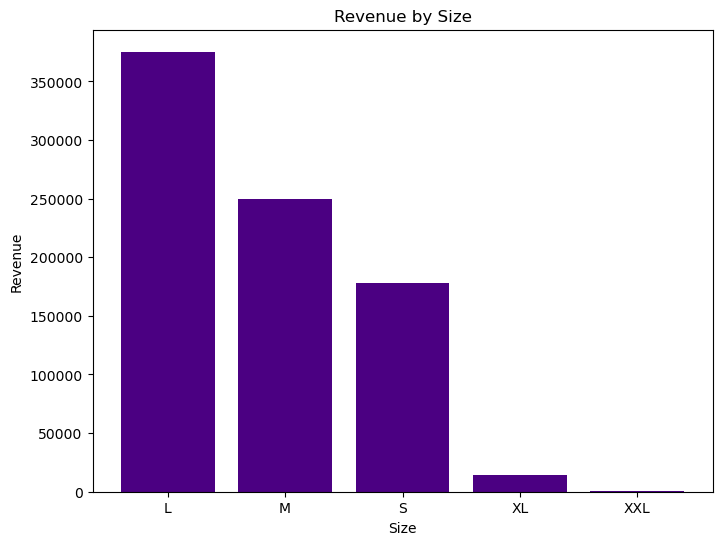

In [32]:
# Visualization
plt.figure(figsize=(8,6))
plt.bar(revenue_by_size['size'], revenue_by_size['revenue'], color='indigo')
#plt.xticks(rotation=90)
plt.xlabel('Size')
plt.ylabel('Revenue')
plt.title('Revenue by Size')
plt.show()

### Revenue Contribution by Size

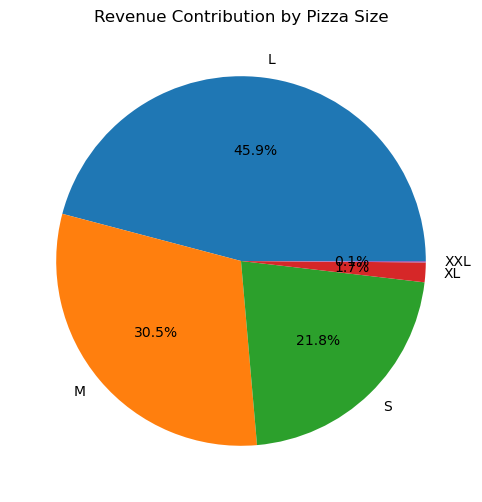

In [33]:
# Define labels and sizes
labels = revenue_by_size['size']
sizes = revenue_by_size['revenue']

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Revenue Contribution by Pizza Size')
plt.show()

#### Insights
The Large pizza size contributes the largest percentage of revenue as opposed to others. Both XL and XXL contribute less due to the following:

- They may be costly for consumers
- They are not well-marketed.
- They may not be available at all times

### Recommendation:
The marketing team should consider running targeted campaigns to promote the XL and XXL sizes. Also, the distribution of customer surveys or questionnaires could provide insights into why these sizes are less popular. This helps prevent losses in sales.

## Revenues generated from the sale of each Category

In [34]:
revenue_by_category= df.groupby('category')['revenue'].sum().reset_index().sort_values(by='revenue', ascending=False)

# viewing in percentages for easy interpretability
revenue_by_category['percentage']= ((revenue_by_category['revenue'])/(revenue_by_category['revenue'].sum()))*100.
revenue_by_category

,category,revenue,percentage
1,Classic,220053.10,26.905960
2,Supreme,208197.00,25.456311
0,Chicken,195919.50,23.955138
3,Veggie,193690.45,23.682591


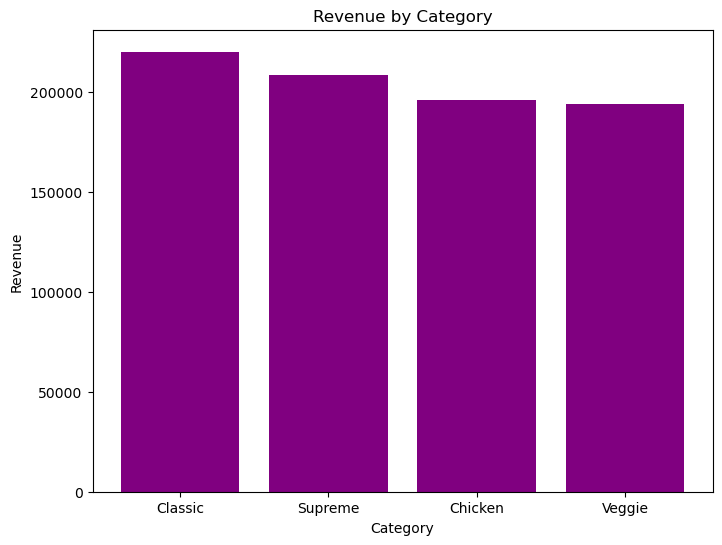

In [35]:
# Visualization
plt.figure(figsize=(8,6))
plt.bar(revenue_by_category['category'], revenue_by_category['revenue'], color='purple')
#plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.title('Revenue by Category')
plt.show()

### Revenue Contribution by Category

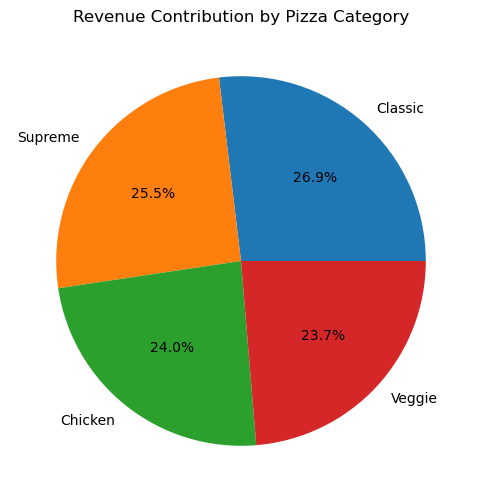

In [36]:
# Define labels and sizes
labels = revenue_by_category['category']
sizes = revenue_by_category['revenue']

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Revenue Contribution by Pizza Category')
plt.show()

#### From the table, we can see that the classic category contributes more to revenue. Also, the percentage each category contributes to the total revenue is fairly balanced, all within the same range of 24% -27%. This shows a healthy distribution of customer preferences across categories. 

In a real-world scenario, it is expected that some categories will perform slightly better than others due to varying consumer tastes. However, it becomes a concern for the pizza place when a particular category contributes an overwhelming majority (e.g., over 90%) of the revenue. This could bring about losses in other categories. Though they could take positives from the situation and concentrate on just that category instead of incurring losses in others. They could also solve this by conducting market research to understand customer preferences and why some other categories are underperforming.


## Highest revenue generating pizzas

In [37]:
top_revenue_pizzas= df.groupby('name')['revenue'].sum().reset_index().sort_values(by='revenue', ascending=False)

# top 5 pizzas with the highest revenue
top_revenue_pizzas.head()

,name,revenue
30,The Thai Chicken Pizza,43434.25
0,The Barbecue Chicken Pizza,42768.00
4,The California Chicken Pizza,41409.50
7,The Classic Deluxe Pizza,38180.50
26,The Spicy Italian Pizza,34831.25


<function matplotlib.pyplot.show(close=None, block=None)>

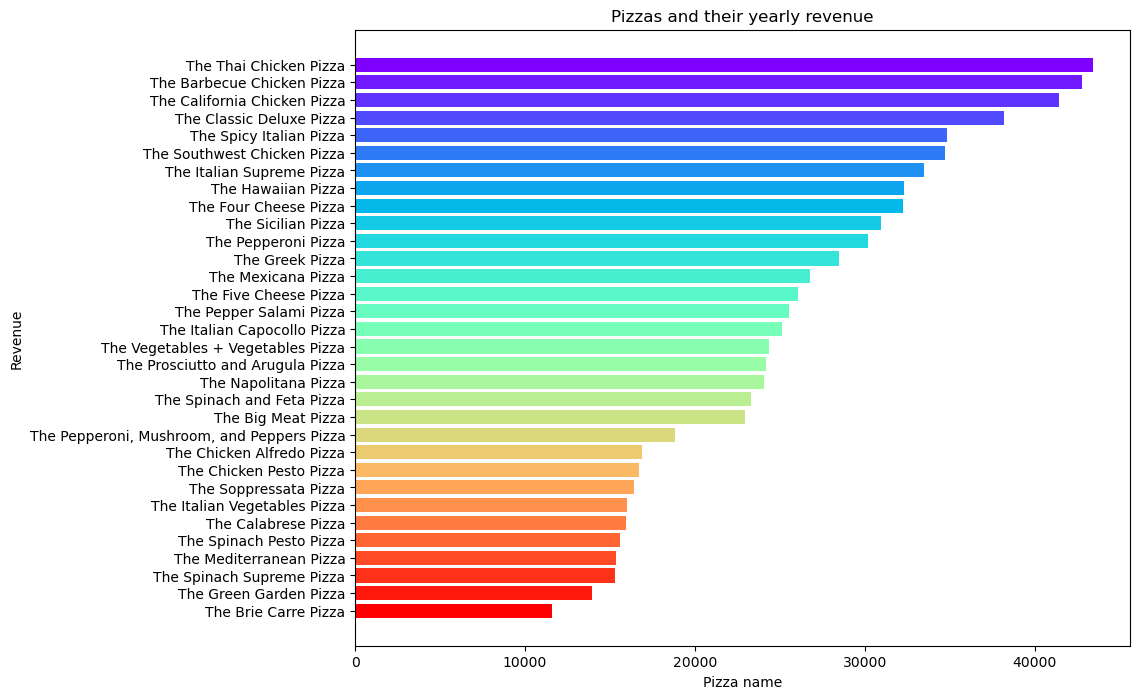

In [38]:
## Visualization to show the pizzas and the revenue they generate
colors=plt.cm.rainbow(np.linspace(0,1, len(top_revenue_pizzas)))
plt.figure(figsize=(10,8))
plt.barh(top_revenue_pizzas['name'], top_revenue_pizzas['revenue'], color=colors)
#plt.xticks(rotation=90)
plt.xlabel('Pizza name')
plt.ylabel('Revenue')
plt.title('Pizzas and their yearly revenue')

# Invert y-axis to have the highest values at the top
plt.gca().invert_yaxis()
plt.show

### Insights

-From the analysis on the top best selling pizzas and the top pizzas generating revenue , the Classic Deluxe Pizza stands out as the best-selling pizza in terms of quantity sold. However, the Thai Chicken Pizza generates the highest revenue, indicating a greater profit margin per unit sold.
While the Classic Deluxe appeals to a larger customer base, the Thai Chicken Pizza is more profitable per sale.